In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler 
from sklearn.metrics import confusion_matrix,r2_score,accuracy_score,recall_score,classification_report
from scipy.stats import zscore

In [385]:
df=pd.read_csv(r"C:\Users\NABAM AMPI\Downloads\dataset_phishing.csv")
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [386]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [387]:
df.select_dtypes(include=['int64', 'float64']).skew()

length_url         8.085190
length_hostname    5.160078
ip                 1.954418
nb_dots            5.718117
nb_hyphens         4.695239
                     ...   
domain_age         0.164187
web_traffic        2.779269
dns_record         6.835821
google_index      -0.136115
page_rank          0.446031
Length: 87, dtype: float64

In [388]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### There is not any need for imputation as there are no missing values within the features in the dataset

In [389]:
df.duplicated().sum()

np.int64(0)

### No duplicates within the dataset


In [390]:
lr=LabelEncoder()
df['status']=lr.fit_transform(df['status'])

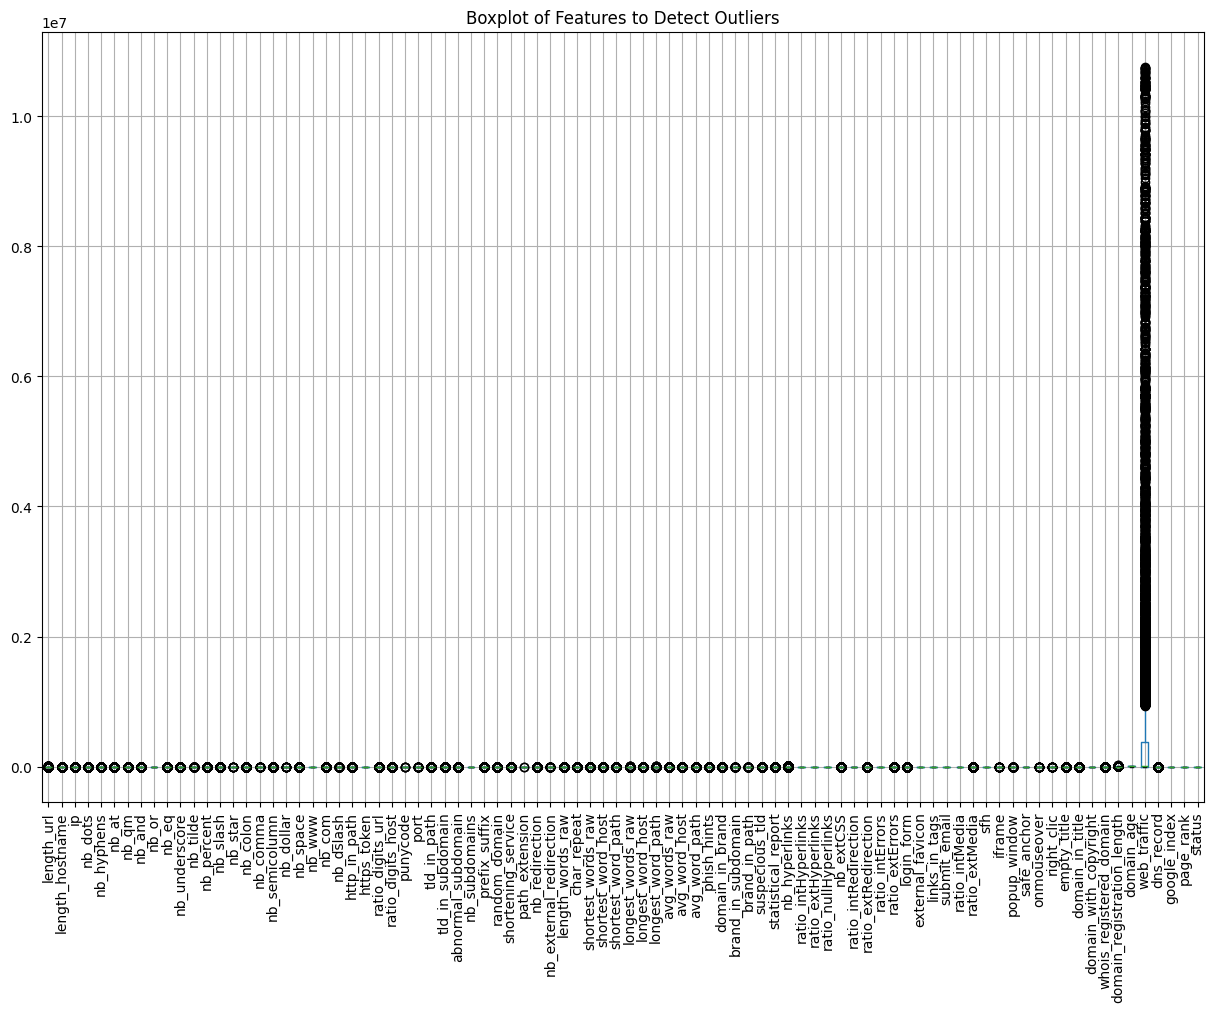

In [391]:
mt.figure(figsize=(15, 10))
df.boxplot(rot=90)
mt.title("Boxplot of Features to Detect Outliers")
mt.show()


In [392]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))
outliers.sum()


length_url          620
length_hostname     775
ip                 1721
nb_dots             567
nb_hyphens         1371
                   ... 
web_traffic        2138
dns_record          230
google_index          0
page_rank             0
status                0
Length: 88, dtype: int64

In [393]:
X=df.select_dtypes(include='number')
Y=df.iloc[:,-1]

In [394]:
Y=df.iloc[:,-1]

In [395]:
sl=StandardScaler()
numerical_cols = df.select_dtypes(include='number')  

In [396]:
X.std()
X.mean()

length_url             61.126684
length_hostname        21.090289
ip                      0.150569
nb_dots                 2.480752
nb_hyphens              0.997550
                       ...      
web_traffic        856756.643307
dns_record              0.020122
google_index            0.533946
page_rank               3.185739
status                  0.500000
Length: 88, dtype: float64

In [397]:
X=sl.fit_transform(X)

In [398]:
print(X.mean())

-3.0164016957922014e-18


In [399]:
print(X.std())

0.9653072991634227


In [400]:
rs=RobustScaler()
X=rs.fit_transform(X)

In [401]:
print(X.mean())

0.24775824490353968


In [402]:
print(X.std())

1.388689914796953


## X has been scaled to mean at 0.24 and std at 1.38 using RobustScaler as outliers exist

In [403]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [404]:
print((len(xtrain)/len(X))*100)

80.0


In [405]:
print((len(xtest)/len(X))*100)

20.0


### Final Preprocessed Dataset

a. No missing values

b. No duplicates

c. Categorical Feature df['status'] : Encoded using LabelEncoder

d. Numerical Features : Scaled using RobustScaler

e.train_test_split :(80/20) splitting done on the datatset

### Encoding Object columns for feature selection


In [406]:
df['url']=lr.fit_transform(df['url'])

In [407]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4501,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,3063,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,8984,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,2778,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,5261,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,4876,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,0
11426,4285,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,1
11427,9916,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,0
11428,5705,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,0


In [408]:
mean=df.mean()
median=df.median()
std=df.std()


### Dropping highly correlated features

In [409]:
corr_matrix= df.corr().abs()
to_drop=[]
for i in corr_matrix.columns:
    for j in corr_matrix.index:
        if i!=j and corr_matrix.loc[i,j]>0.9:
            if i not in to_drop and j not in to_drop:
                to_drop.append(i)


df_reduced=df.drop(columns=list(to_drop))
print(f'dropped columns : {to_drop}')

dropped columns : ['nb_and', 'longest_words_raw']


### Feature Selection

In [410]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

### Train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [411]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X,Y)

RandomForestClassifier(random_state=42)

In [412]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=False)

In [413]:
importances.head(30)

,feature,importance
86,google_index,0.169845
87,page_rank,0.108952
57,nb_hyperlinks,0.087257
84,web_traffic,0.059798
21,nb_www,0.048636
83,domain_age,0.029249
59,ratio_extHyperlinks,0.027498
58,ratio_intHyperlinks,0.027255
47,longest_word_path,0.026494
51,phish_hints,0.025007


In [414]:
top_features = importances.head(30)['feature']
# Create a reduced dataset
X_selected = X[top_features]
X_selected

,google_index,page_rank,nb_hyperlinks,web_traffic,nb_www,domain_age,ratio_extHyperlinks,ratio_intHyperlinks,longest_word_path,phish_hints,...,length_words_raw,domain_registration_length,char_repeat,nb_slash,shortest_word_host,ratio_digits_host,nb_dots,avg_words_raw,shortest_word_path,avg_word_host
0,1,4,17,0,1,-1,0.470588,0.529412,6,0,...,4,45,4,3,3,0.000000,3,5.750000,3,7.00
1,1,2,30,0,0,5767,0.033333,0.966667,32,0,...,4,77,4,5,19,0.000000,1,15.750000,2,19.00
2,1,0,4,5828815,0,4004,0.000000,1.000000,17,0,...,12,14,2,5,3,0.000000,4,8.250000,2,8.40
3,0,3,149,107721,0,-1,0.026846,0.973154,0,0,...,1,62,0,2,5,0.000000,2,5.000000,0,5.00
4,0,6,102,8725,1,8175,0.529412,0.470588,11,0,...,6,224,3,5,3,0.000000,2,6.333333,4,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,6,199,3980,1,5396,0.115578,0.884422,11,0,...,4,448,4,4,3,0.000000,2,7.750000,8,6.00
11426,1,0,3,0,1,6728,0.000000,1.000000,8,0,...,12,211,3,5,3,0.000000,5,5.166667,3,6.50
11427,1,10,68,8,1,8515,0.529412,0.470588,15,0,...,13,2809,5,5,3,0.000000,2,6.153846,1,5.50
11428,0,4,32,2455493,1,2836,0.625000,0.375000,0,0,...,2,85,3,3,3,0.000000,2,12.500000,0,12.50


In [415]:
rfc.fit(X_selected,Y)

RandomForestClassifier(random_state=42)

In [416]:
rfc.fit(xtest,ytest)
ypred=rfc.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00      1697

    accuracy                           1.00      3429
   macro avg       1.00      1.00      1.00      3429
weighted avg       1.00      1.00      1.00      3429



## Feature Engineering

### Renaming columns with the word 'nb_'  and adding the prefix : 'Count of'
### Example: nb_at --> Count of at

In [417]:
df.columns = [col.replace('nb','Count_of') for col in df.columns]
df.columns=[col.replace('length','length_of') for col in df.columns]
df.columns

Index(['url', 'length_of_url', 'length_of_hostname', 'ip', 'Count_of_dots',
       'Count_of_hyphens', 'Count_of_at', 'Count_of_qm', 'Count_of_and',
       'Count_of_or', 'Count_of_eq', 'Count_of_underscore', 'Count_of_tilde',
       'Count_of_percent', 'Count_of_slash', 'Count_of_star', 'Count_of_colon',
       'Count_of_comma', 'Count_of_semicolumn', 'Count_of_dollar',
       'Count_of_space', 'Count_of_www', 'Count_of_com', 'Count_of_dslash',
       'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
       'abnormal_subdomain', 'Count_of_subdomains', 'prefix_suffix',
       'random_domain', 'shortening_service', 'path_extension',
       'Count_of_redirection', 'Count_of_external_redirection',
       'length_of_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       

# Renamed columns with the words like ratio_extHyperlinks:
# Example : ratio_intHyperlinks --> ratio_of_internal_hyperlinks

In [418]:
df.columns=[col.replace('ratio_','ratio_of_') for col in df.columns]
df.columns=[col.replace('_ext','_external_') for col in df.columns]
df.columns=[col.replace('_int','_internal_') for col in df.columns]
df.columns=[col.replace('ratio__','ratio_of') for col in df.columns]

df.columns

Index(['url', 'length_of_url', 'length_of_hostname', 'ip', 'Count_of_dots',
       'Count_of_hyphens', 'Count_of_at', 'Count_of_qm', 'Count_of_and',
       'Count_of_or', 'Count_of_eq', 'Count_of_underscore', 'Count_of_tilde',
       'Count_of_percent', 'Count_of_slash', 'Count_of_star', 'Count_of_colon',
       'Count_of_comma', 'Count_of_semicolumn', 'Count_of_dollar',
       'Count_of_space', 'Count_of_www', 'Count_of_com', 'Count_of_dslash',
       'http_in_path', 'https_token', 'ratio_of_digits_url',
       'ratio_of_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'Count_of_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_external_ension', 'Count_of_redirection',
       'Count_of_external_ernal_redirection', 'length_of_words_raw',
       'char_repeat', 'shortest_words_raw', 'shortest_word_host',
       'shortest_word_path', 'longest_words_raw', 'longest_word_host',
       'longest_word_path',

In [419]:
rfc.score(xtrain,ytrain)

0.9581302337207849

In [420]:
rfc.score(xtest,ytest)

1.0

In [428]:
X_train_scaled = sl.fit_transform(xtrain)
X_test_scaled = sl.transform(xtest)


In [429]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train_scaled)

PCA()

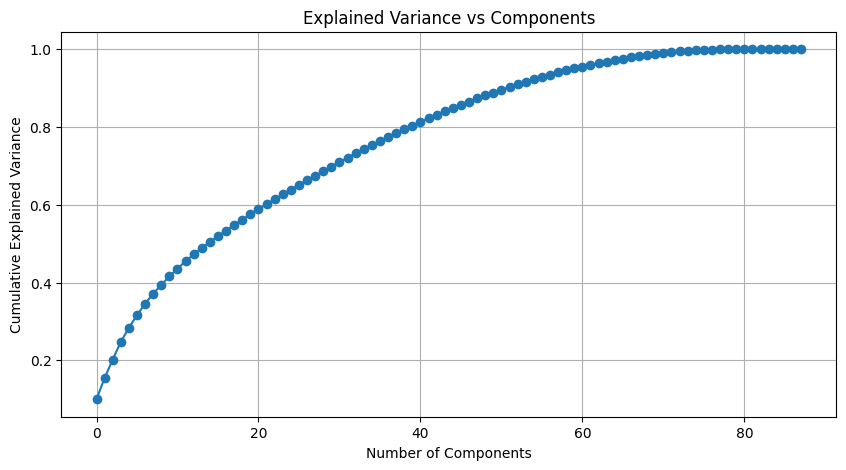

In [437]:
mt.figure(figsize=(10, 5))
mt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
mt.xlabel('Number of Components')
mt.ylabel('Cumulative Explained Variance')
mt.grid(True)
mt.title('Explained Variance vs Components')
mt.show()

## Classification Models Implementation

In [430]:
def create_model(model):
    model.fit(X_train_scaled,ytrain)
    ypred=model.predict(X_test_scaled)
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))   
    return model


In [431]:
from sklearn.linear_model import LogisticRegression
lr=create_model(LogisticRegression())


[[1652   80]
 [  94 1603]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1732
           1       0.95      0.94      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



In [432]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=create_model(GradientBoostingClassifier(learning_rate=0.5,n_estimators=500))

[[1680   52]
 [  50 1647]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1732
           1       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



In [440]:
from xgboost import XGBClassifier
xgb=create_model(XGBClassifier(n_estimators=500,max_depth=4,reg_alpha=0.5))

[[1679   53]
 [  47 1650]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1732
           1       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



In [434]:
from sklearn.svm import SVC
svc=create_model(SVC(C=1.0,  random_state=42))

[[1666   66]
 [  70 1627]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1732
           1       0.96      0.96      0.96      1697

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



In [439]:

print("Train Accuracy:", accuracy_score(ytrain, xgb.predict(xtrain)))
print("Test Accuracy:", accuracy_score(ytest, xgb.predict(xtest)))


Train Accuracy: 0.6897887764029497
Test Accuracy: 0.7039953339165937


In [427]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X, Y, cv=5, scoring='accuracy')
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.96920384951881


# Analysis

## Overview 
#### 
Type: Supervised classification dataset

Rows: 11,000+

Features: 30+ (mostly numerical)

Target Column: status (1 = Phishing, 0 = Legitimate)

Data Quality: No missing values or nulls

Preprocessing Performed:

a. Label encoding of target

b. Scaling using RobustScaler

c. Checked and counted outliers using IQR method

## EDA
### 
1. Balanced Dataset for existing outliers
2. Scaled features to mean at 0.24 and std at 1.38
3. Encoded target column to numeric
4. Dropped Columns: 'nb_and', 'longest_words_raw'
5. Important features acquired with RandomForestClassifer
6. Feature Engineering done as per necessity
7. Reduced overfitting with PCA

## Conclusion
#### The trained XGBoost model delivers 97% accuracy in phishing detection. It's effective, lightweight, and suitable for integration into real-world security pipelines.


## Real-world Application

1. Email filtering
2. Cybersecurity Software
3. Browser extensions